# Unit 5 - Financial Planning

In [65]:
# Initial imports
import os
import requests
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [66]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [67]:
# Set current amount of crypto assets
crypto_holding = {
    "holdings": [1.2, 5.3]
}
crypto = ["my_btc","my_eth"]
Crypto_total = pd.DataFrame(crypto_holding, index = crypto)
Crypto_total

,holdings
my_btc,1.2
my_eth,5.3


In [68]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [69]:
# Fetch data using requests from url

btc_data = requests.get(btc_url).json()
eth_data = requests.get(eth_url).json()

In [70]:
# Fetch current BTC price
btc_price = btc_data["data"]["1"]["quotes"]["CAD"]["price"]
# Fetch current ETH price
eth_price = eth_data["data"]["1027"]["quotes"]["CAD"]["price"]

# Fetch current BTC holding
btc = Crypto_total.loc["my_btc"]["holdings"]
# Fetch current ETH holding
eth = Crypto_total.loc["my_eth"]["holdings"]

# Compute current value of my crpto
my_btc_value = btc_price * btc
my_eth_value = eth_price * eth

# Print current crypto wallet balance
print(f"The current value of your {btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $77697.53
The current value of your 5.3 ETH is $29479.29


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [71]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [72]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [73]:
# Format current date as ISO format
today = pd.Timestamp("2021-12-03", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
my_portfolio = api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today,
    limit = 1000
).df

# Preview DataFrame
my_portfolio

AGG                                      SPY  \
                            open    high     low   close   volume    open   
time                                                                        
2021-12-03 00:00:00-05:00  114.5  115.24  114.46  115.06  7279561  459.17   

                                                             
                            high     low   close     volume  
time                                                         
2021-12-03 00:00:00-05:00  460.3  448.92  453.43  124795750

In [74]:
# Pick AGG and SPY close prices
agg_close_price = float(my_portfolio["AGG"]["close"])
spy_close_price = float(my_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.06
Current SPY closing price: $453.43


In [75]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22671.50
The current value of your 200 AGG shares is $23012.00


### Savings Health Analysis

In [76]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
Total_Crypto_Value = my_btc_value + my_eth_value
Total_Share_Value = my_spy_value + my_spy_value

# Create savings DataFrame
Total_holding = { "Amount" :[round(Total_Crypto_Value,2),round(Total_Share_Value,2)]}
Row = [ "Crypto" , "Shares" ]
df_savings = pd.DataFrame(Total_holding, index = Row)

# Display savings DataFrame
df_savings.head()

,Amount
Crypto,107176.82
Shares,45343.00


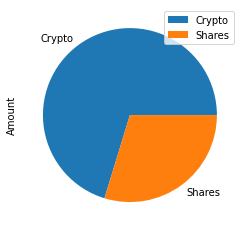

In [77]:
# Plot savings pie chart
plot = df_savings.plot.pie(y = 'Amount')

In [78]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
Total_Savings = Total_Crypto_Value + Total_Share_Value
Total_Savings
# Validate saving health

if Total_Savings > emergency_fund:
    print(f"Congratulations! You have enough money in your emergency fund")
elif Total_Savings < emergency_fund:
    print(f"You are ${emergency_fund - Total_Savings} away from reaching the goal")
else:
    print(f"Congratulations! You have reached your financial goal")


Congratulations! You have enough money in your emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [79]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-12-05', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-12-05', tz='America/New_York').isoformat()

In [80]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df

# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open    high      low   close     volume    open   
time                                                                            
2017-12-13 00:00:00-05:00  109.23  109.55  109.135  109.41  2638160.0     NaN   
2017-12-14 00:00:00-05:00  109.31  109.51  109.230  109.45  3698172.0  267.12   
2017-12-15 00:00:00-05:00  109.42  109.55  109.315  109.47  2034072.0  265.45   
2017-12-18 00:00:00-05:00  109.47  109.47  109.250  109.31  3090761.0  268.08   
2017-12-19 00:00:00-05:00  109.14  109.16  108.890  109.00  2583809.0  268.48   

                                                               
                             high     low   close      volume  
time                                                           
2017-12-13 00:00:00-05:00     NaN     NaN     NaN         NaN  
2017-12-14 00:00:00-05:00  267.22  265.60  265.67  57343318.0  
2017-12-15 00:00:00-05:00  267.04  265.39  266.53  59269913.0  
2017-12-18 00:00:00-05:00  268.60  267.98  268.18  45691370.0  
2017-12-19 00:00:00-05:00  268.53  267.09  267.22  46990895.0

In [110]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
w1 = 0.40
w2 = 0.60
MC_30_yrs = MCSimulation(portfolio_data = df_stock_data,
    weights = [w1, w2],
    num_simulation = 500,
    num_trading_days = 252*30
)
MC_30_yrs.portfolio_data.head()

AGG                                      \
                             open    high      low   close     volume   
time                                                                    
2017-12-13 00:00:00-05:00  109.23  109.55  109.135  109.41  2638160.0   
2017-12-14 00:00:00-05:00  109.31  109.51  109.230  109.45  3698172.0   
2017-12-15 00:00:00-05:00  109.42  109.55  109.315  109.47  2034072.0   
2017-12-18 00:00:00-05:00  109.47  109.47  109.250  109.31  3090761.0   
2017-12-19 00:00:00-05:00  109.14  109.16  108.890  109.00  2583809.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-12-13 00:00:00-05:00          NaN     NaN     NaN     NaN     NaN   
2017-12-14 00:00:00-05:00     0.000366  267.12  267.22  265.60  265.67   
2017-12-15 00:00:00-05:00     0.000183  265.45  267.04  265.39  266.53   
2017-12-18 00:00:00-05:00    -0.001462  268.08  268.60  267.98  268.18   
2017-12-19 00:00:00-05:00    -0.002836  268.48  268.53  267.09  267.22   

                                                    
                               volume daily_return  
time                                                
2017-12-13 00:00:00-05:00         NaN          NaN  
2017-12-14 00:00:00-05:00  57343318.0          NaN  
2017-12-15 00:00:00-05:00  59269913.0     0.003237  
2017-12-18 00:00:00-05:00  45691370.0     0.006191  
2017-12-19 00:00:00-05:00  46990895.0    -0.003580

In [85]:
# Printing the simulation input data
np.random.seed(0)
MC_30_yrs.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/priyasatheesh/Desktop/BC_Homeworks/API_Assignment/Assignment/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006022,0.989701,1.001622,0.996058,1.000576,0.999044,0.997455,0.987420,1.019812,1.008069,...,1.002044,1.004726,1.005451,1.002093,1.003580,1.016873,1.005829,0.987903,1.003776,1.005591
2,1.019463,0.983976,0.994971,0.999414,1.007766,0.995088,0.998267,0.982790,1.013023,1.004588,...,1.003537,1.011354,1.013218,1.008215,0.992041,1.016585,1.005513,0.989988,1.007596,1.009922
3,1.017405,0.993889,0.994201,1.004336,1.004878,0.994221,1.005311,0.975628,1.013157,0.999325,...,0.993182,1.015764,1.013096,1.008826,0.976575,1.024715,1.027000,0.999032,1.021088,1.007342
4,1.017922,0.991190,1.014069,1.011206,0.998492,0.987333,0.995474,0.980515,1.018941,0.988626,...,0.986073,1.020479,1.022436,1.030955,0.981372,1.020539,1.032276,1.004004,1.031030,1.009352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,8.906132,8.309974,39.183557,11.748631,15.003652,86.131772,90.419190,37.948188,115.299756,21.849926,...,8.630865,14.614722,7.387353,22.913863,12.534782,17.314285,10.722328,22.126457,2.260773,14.487034
7557,8.935882,8.509508,39.238225,11.796398,15.089835,86.680861,90.463150,38.365242,115.159445,21.853343,...,8.617332,14.470989,7.476728,22.772949,12.562107,16.960179,10.692550,22.285749,2.272427,14.579263
7558,8.920895,8.492455,39.141908,11.827586,15.064329,85.575173,91.798130,38.686935,115.718502,21.710179,...,8.602319,14.507176,7.504068,22.685094,12.407682,17.140915,10.799160,22.235501,2.276224,14.544420
7559,8.924834,8.427293,38.657466,11.884572,15.056569,85.071456,92.235671,38.683562,115.048308,22.010702,...,8.555808,14.479777,7.462115,22.450138,12.386460,17.105838,10.783538,22.069136,2.248594,14.713238


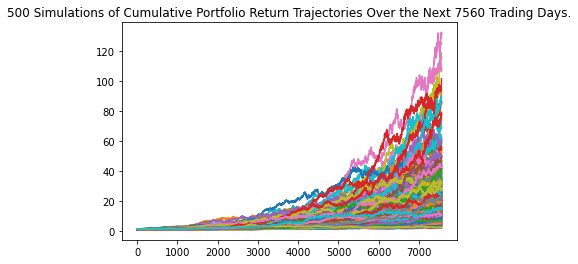

In [86]:
# Plot simulation outcomes
line_plot = MC_30_yrs.plot_simulation()
line_plot.get_figure().savefig("MC_30year_sim_plot.png", bbox_inches="tight")

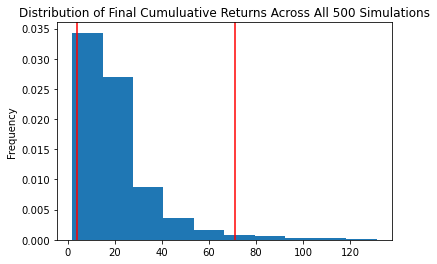

In [88]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30_yrs.plot_distribution()
dist_plot.get_figure().savefig('MC_30yr_dist_plot.png',bbox_inches='tight')

### Retirement Analysis

In [89]:
# Fetch summary statistics from the Monte Carlo simulation results
Summ_Stats = MC_30_yrs.summarize_cumulative_return()
# Print summary statistics
print(Summ_Stats)

count           500.000000
mean             20.788600
std              16.955358
min               1.862626
25%              10.819248
50%              16.346197
75%              24.661859
max             131.243829
95% CI Lower      3.945296
95% CI Upper     71.072448
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [90]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
Lower = round(Summ_Stats[8]*initial_investment,2)
Upper = round(Summ_Stats[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${Lower} and ${Upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $78905.92 and $1421448.96


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [107]:
# Set initial investment
initial_investment_2 = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
Lower_2 = round(Summ_Stats[8]*initial_investment_2,2)
Upper_2 = round(Summ_Stats[9]*initial_investment_2,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_2} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${Lower_2} and ${Upper_2}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $118358.89 and $2132173.43


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [111]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
w3 = 0.2
w4 = 0.8
MC_5_yrs = MCSimulation(portfolio_data = df_stock_data,
    weights = [w3, w4],
    num_simulation = 500,
    num_trading_days = 252*5
)
MC_30_yrs.portfolio_data.head()

AGG                                      \
                             open    high      low   close     volume   
time                                                                    
2017-12-13 00:00:00-05:00  109.23  109.55  109.135  109.41  2638160.0   
2017-12-14 00:00:00-05:00  109.31  109.51  109.230  109.45  3698172.0   
2017-12-15 00:00:00-05:00  109.42  109.55  109.315  109.47  2034072.0   
2017-12-18 00:00:00-05:00  109.47  109.47  109.250  109.31  3090761.0   
2017-12-19 00:00:00-05:00  109.14  109.16  108.890  109.00  2583809.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-12-13 00:00:00-05:00          NaN     NaN     NaN     NaN     NaN   
2017-12-14 00:00:00-05:00     0.000366  267.12  267.22  265.60  265.67   
2017-12-15 00:00:00-05:00     0.000183  265.45  267.04  265.39  266.53   
2017-12-18 00:00:00-05:00    -0.001462  268.08  268.60  267.98  268.18   
2017-12-19 00:00:00-05:00    -0.002836  268.48  268.53  267.09  267.22   

                                                    
                               volume daily_return  
time                                                
2017-12-13 00:00:00-05:00         NaN          NaN  
2017-12-14 00:00:00-05:00  57343318.0          NaN  
2017-12-15 00:00:00-05:00  59269913.0     0.003237  
2017-12-18 00:00:00-05:00  45691370.0     0.006191  
2017-12-19 00:00:00-05:00  46990895.0    -0.003580

In [112]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
np.random.seed(0)
MC_5_yrs.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/priyasatheesh/Desktop/BC_Homeworks/API_Assignment/Assignment/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003060,1.008372,1.002672,1.000112,1.001091,0.981167,1.004898,0.999723,0.994246,0.988142,...,1.003724,0.994990,0.975561,0.983368,0.999906,0.992202,0.992699,1.004931,0.991460,1.020755
2,0.988830,1.029684,0.985070,0.995071,0.978920,0.979390,0.996232,0.982026,0.985217,0.980522,...,1.002630,1.013625,0.971546,0.981563,0.979682,0.979221,0.988205,1.005674,1.005374,1.027746
3,0.986285,1.016606,0.977064,0.980545,0.961986,0.955014,0.988672,0.976492,0.977167,0.975426,...,1.019303,1.023737,0.985375,0.982311,0.984147,0.984954,0.995970,1.006613,0.989958,1.020459
4,1.009468,1.017521,0.984537,0.993211,0.964754,0.972946,0.998567,0.960028,0.989878,0.969534,...,1.034258,1.042786,0.997916,0.991100,0.994362,0.989383,1.014876,1.007627,0.988719,1.045218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.317714,2.008850,1.260634,1.267741,0.855814,3.790453,1.819301,2.774089,2.287434,1.215096,...,1.388367,1.592160,1.904170,1.621206,1.874195,1.514129,1.486949,2.421932,3.977729,2.086932
1257,1.302997,2.009051,1.264559,1.267642,0.852448,3.805970,1.801097,2.827001,2.295451,1.230785,...,1.374512,1.589936,1.910124,1.625304,1.869065,1.520077,1.523581,2.367130,3.999998,2.084073
1258,1.316958,2.004899,1.248236,1.285820,0.857069,3.805555,1.833941,2.813172,2.347020,1.211181,...,1.370696,1.602006,1.868341,1.624641,1.891693,1.515144,1.522685,2.351163,4.026705,2.083340
1259,1.309771,2.035136,1.242084,1.286588,0.860038,3.818108,1.824009,2.835996,2.356161,1.224468,...,1.339666,1.605874,1.873040,1.641079,1.884962,1.492942,1.541335,2.348678,4.059795,2.061588


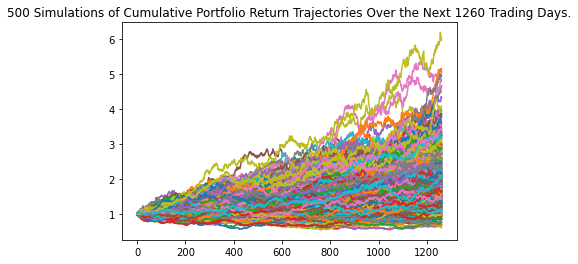

In [113]:
# Plot simulation outcomes
line_plot = MC_5_yrs.plot_simulation()
line_plot.get_figure().savefig("MC_5year_sim_plot.png", bbox_inches="tight")

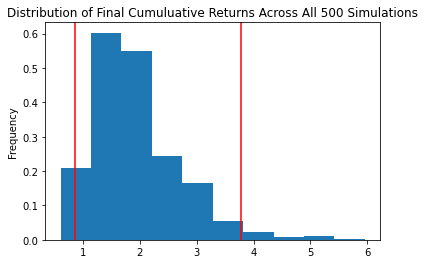

In [114]:
# Plot probability distribution and confidence intervals
dist_plot = MC_5_yrs.plot_distribution()
dist_plot.get_figure().savefig('MC_5yr_dist_plot.png',bbox_inches='tight')

In [115]:
# Fetch summary statistics from the Monte Carlo simulation results
Summ_Stats_5 = MC_5_yrs.summarize_cumulative_return()

# Print summary statistics
print(Summ_Stats_5)

count           500.000000
mean              1.935442
std               0.769341
min               0.609605
25%               1.426841
50%               1.778333
75%               2.297530
max               5.955268
95% CI Lower      0.864995
95% CI Upper      3.782317
Name: 1260, dtype: float64


In [116]:
# Set initial investment
initial_inv_5 = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
Lower_5 = round(Summ_Stats_5[8]*initial_inv_5,2)
Upper_5 = round(Summ_Stats_5[9]*initial_inv_5,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${Lower_5} and ${Upper_5}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $17299.9 and $75646.33


### Ten Years Retirement Option

In [117]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
w5 = 0.8
w6 = 0.2
MC_10_yrs = MCSimulation(portfolio_data = df_stock_data,
    weights = [w5, w6],
    num_simulation = 500,
    num_trading_days = 252*10
)
MC_10_yrs.portfolio_data.head()

AGG                                      \
                             open    high      low   close     volume   
time                                                                    
2017-12-13 00:00:00-05:00  109.23  109.55  109.135  109.41  2638160.0   
2017-12-14 00:00:00-05:00  109.31  109.51  109.230  109.45  3698172.0   
2017-12-15 00:00:00-05:00  109.42  109.55  109.315  109.47  2034072.0   
2017-12-18 00:00:00-05:00  109.47  109.47  109.250  109.31  3090761.0   
2017-12-19 00:00:00-05:00  109.14  109.16  108.890  109.00  2583809.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-12-13 00:00:00-05:00          NaN     NaN     NaN     NaN     NaN   
2017-12-14 00:00:00-05:00     0.000366  267.12  267.22  265.60  265.67   
2017-12-15 00:00:00-05:00     0.000183  265.45  267.04  265.39  266.53   
2017-12-18 00:00:00-05:00    -0.001462  268.08  268.60  267.98  268.18   
2017-12-19 00:00:00-05:00    -0.002836  268.48  268.53  267.09  267.22   

                                                    
                               volume daily_return  
time                                                
2017-12-13 00:00:00-05:00         NaN          NaN  
2017-12-14 00:00:00-05:00  57343318.0          NaN  
2017-12-15 00:00:00-05:00  59269913.0     0.003237  
2017-12-18 00:00:00-05:00  45691370.0     0.006191  
2017-12-19 00:00:00-05:00  46990895.0    -0.003580

In [118]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
np.random.seed(0)
MC_10_yrs.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/priyasatheesh/Desktop/BC_Homeworks/API_Assignment/Assignment/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005040,0.999063,1.003935,1.002220,0.994092,1.004350,1.004928,0.999452,0.999782,1.001004,...,0.997131,0.998255,1.004795,1.003948,0.994509,0.994990,0.995440,1.000971,0.993097,0.999965
2,1.007609,1.005262,1.000467,1.005727,0.996086,1.013095,1.002944,0.991225,0.993477,1.004900,...,0.993522,0.997449,1.005984,1.006098,0.993031,0.997417,0.996050,0.995453,0.993509,0.996697
3,1.013913,1.005783,1.001428,1.008533,1.000023,1.015618,1.006598,0.987261,0.996500,1.011336,...,0.990645,1.006644,1.009020,1.006729,0.995914,0.999041,0.991766,0.997500,0.997730,0.997413
4,1.020596,1.001629,0.996788,1.003934,1.001677,1.014661,1.004708,0.995776,1.001216,1.010525,...,0.987583,1.010331,1.010555,1.001662,0.994276,1.005355,0.991616,0.998535,0.993028,0.997866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.227543,1.172650,1.570273,1.895227,1.460617,1.309012,1.323506,1.537021,1.909167,1.142569,...,1.358202,1.697997,0.981800,1.044312,1.648573,0.939933,1.828808,1.417177,1.115640,1.614861
2517,1.224427,1.172936,1.570177,1.899237,1.466457,1.321022,1.322766,1.542141,1.898740,1.138138,...,1.356764,1.699344,0.975879,1.046299,1.639197,0.937544,1.835776,1.408577,1.117637,1.619047
2518,1.226547,1.172860,1.571849,1.905948,1.468082,1.312178,1.324006,1.535939,1.899672,1.139814,...,1.356648,1.700757,0.975553,1.047848,1.642383,0.938555,1.823524,1.408803,1.118083,1.624977
2519,1.229756,1.171598,1.573784,1.906553,1.473568,1.312930,1.329323,1.542165,1.889420,1.135770,...,1.360857,1.700732,0.980347,1.047822,1.649607,0.945202,1.815191,1.414051,1.123589,1.627558


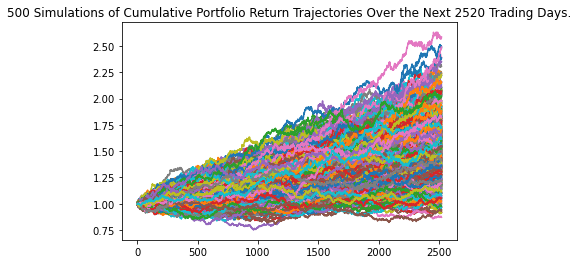

In [119]:
# Plot simulation outcomes
line_plot = MC_10_yrs.plot_simulation()
line_plot.get_figure().savefig("MC_10year_sim_plot.png", bbox_inches="tight")

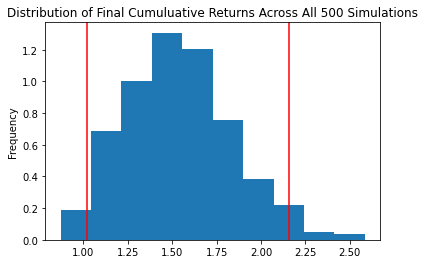

In [120]:
# Plot probability distribution and confidence intervals
dist_plot = MC_10_yrs.plot_distribution()
dist_plot.get_figure().savefig('MC_10yr_dist_plot.png',bbox_inches='tight')

In [121]:
# Fetch summary statistics from the Monte Carlo simulation results
Summ_Stats_10 = MC_10_yrs.summarize_cumulative_return()

# Print summary statistics
print(Summ_Stats_10)

count           500.000000
mean              1.541170
std               0.302001
min               0.871188
25%               1.324713
50%               1.520686
75%               1.724533
max               2.584928
95% CI Lower      1.017659
95% CI Upper      2.159320
Name: 2520, dtype: float64


In [122]:
# Set initial investment
initial_inv_10 = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
Lower_10 = round(Summ_Stats_10[8]*initial_inv_10,2)
Upper_10 = round(Summ_Stats_10[9]*initial_inv_10,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${Lower_10} and ${Upper_10}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $20353.18 and $43186.39


In [137]:
ret_plan = {
    "Retire in 30 years": [initial_investment,w1*100,w2*100,Lower, Upper],
    "Retire in 30 years with more inv_amt": [initial_investment_2,w1*100,w2*100,Lower_2, Upper_2],
    "Retire in 5 years":[initial_inv_5,w3*100,w4*100,Lower_5, Upper_5],
    "Retire in 10 years": [initial_inv_10,w5*100,w6*100,Lower_10, Upper_10],    
}
ret = ["Investment Amount in $","Bond holding %", "Stock holding %", "Expected Min Return in $","Expected Max return in $"]
Ret_total = pd.DataFrame(ret_plan, index = ret)
Ret_total

,Retire in 30 years,Retire in 30 years with more inv_amt,Retire in 5 years,Retire in 10 years
Investment Amount in $,20000.00,30000.00,20000.00,20000.00
Bond holding %,40.00,40.00,20.00,80.00
Stock holding %,60.00,60.00,80.00,20.00
Expected Min Return in $,78905.92,118358.89,17299.90,20353.18
Expected Max return in $,1421448.96,2132173.43,75646.33,43186.39
